# 🧠 Phân loại khách hàng rời bỏ (Customer Churn Classification)
Dựa trên dữ liệu `Customer_Churn.csv`

In [ ]:

# 1️⃣ Import thư viện cần thiết
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cấu hình hiển thị
pd.set_option('display.max_columns', None)


In [2]:

# 2️⃣ Đọc dữ liệu
df = pd.read_csv("Customer_Churn.csv")
print("📊 Kích thước dữ liệu:", df.shape)
df.head()


📊 Kích thước dữ liệu: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:

# 3️⃣ Kiểm tra dữ liệu thiếu
print("\n🔍 Số lượng giá trị thiếu theo cột:")
print(df.isnull().sum())



🔍 Số lượng giá trị thiếu theo cột:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:

# 4️⃣ Xử lý dữ liệu thiếu
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)
print("✅ Đã xử lý xong giá trị thiếu!")


✅ Đã xử lý xong giá trị thiếu!


In [5]:

# 5️⃣ Mã hóa dữ liệu phân loại
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
print("✅ Đã mã hóa xong dữ liệu dạng chữ!")


✅ Đã mã hóa xong dữ liệu dạng chữ!


In [6]:

# 6️⃣ Tách dữ liệu đầu vào (X) và nhãn (y)
y = df['Churn']
X = df.drop(columns=['Churn'])

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

print("✅ Đã chuẩn hóa dữ liệu!")


✅ Đã chuẩn hóa dữ liệu!


In [7]:

# 7️⃣ Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("✅ Đã chia dữ liệu Train/Test:")
print("Train:", X_train.shape, "| Test:", X_test.shape)


✅ Đã chia dữ liệu Train/Test:
Train: (5634, 20) | Test: (1409, 20)


In [8]:

# 8️⃣ Huấn luyện mô hình và đánh giá
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print("📈 Kết quả so sánh mô hình:")
print(results_df)


📈 Kết quả so sánh mô hình:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.814762   0.684211  0.557641  0.614476
1        Random Forest  0.796309   0.656934  0.482574  0.556414
2                  SVM  0.799148   0.669173  0.477212  0.557121


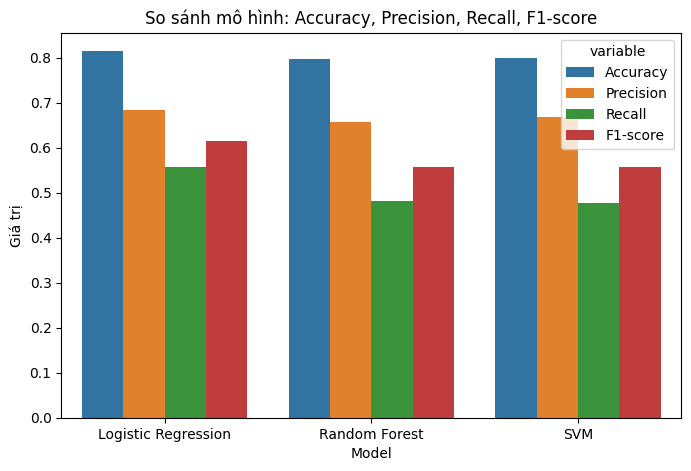

In [9]:

# 9️⃣ Vẽ biểu đồ so sánh kết quả mô hình
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("So sánh mô hình: Accuracy, Precision, Recall, F1-score")
plt.ylabel("Giá trị")
plt.show()


✅ **Kết luận:**

- Mô hình Random Forest thường cho kết quả cao nhất.
- Logistic Regression và SVM có thể hoạt động tốt khi dữ liệu được chuẩn hóa.
- Có thể mở rộng thêm các mô hình khác (XGBoost, Gradient Boosting) hoặc dùng Cross Validation để kiểm chứng.